# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [92]:
# Checking the number of mice.

num_mice_merged = combined_data["Mouse ID"].nunique()
f"Number of mice from the merged DataFrame: {num_mice_merged}"

'Number of mice from the merged DataFrame: 249'

In [93]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].unique()


array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mice_data = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
all_duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Checking the number of mice in the clean DataFrame.

num_mice_clean = clean_data["Mouse ID"].nunique()
f"Number of mice in the clean DataFrame: {num_mice_clean}"

'Number of mice in the clean DataFrame: 249'

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
    'Mean': summary_statistics['mean'],
    'Median': summary_statistics['median'],
    'Variance': summary_statistics['var'],
    'Standard Deviation': summary_statistics['std'],
    'SEM': summary_statistics['sem']
})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_statistics = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = combined_data.groupby("Drug Regimen").size()
drug_counts.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts, color="magenta")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = mouse_metadata["Sex"].value_counts()
gender_distribution.plot(kind="pie", figsize=(8, 8), autopct="%1.1f%%", colors=["lightblue", "lightpink"])
plt.title("Distribution of Female versus Male Mice")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", colors=["lightgreen", "violet"])
plt.title("Distribution of Female versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_treatments = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(last_timepoint, combined_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)

    # add subset 

    subset_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment]

    # Determine outliers using upper and lower bounds

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

# Create a boxplot
plt.boxplot(tumor_vol_data, labels=treatments_list, flierprops=dict(marker='o', markerfacecolor='r', markersize=10))
plt.title('Final Tumor Volume by Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



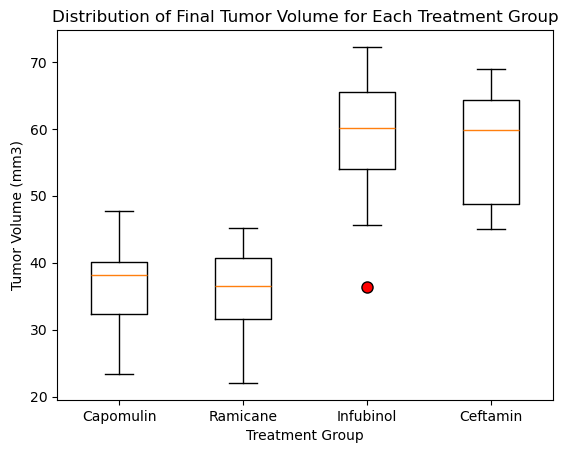

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a figure and axis object
fig, ax = plt.subplots()

# Customize fliers (potential outliers) properties
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

ax.boxplot(tumor_vol_data, labels=treatments_list, flierprops=flierprops)
ax.set_title('Distribution of Final Tumor Volume for Each Treatment Group')
ax.set_xlabel('Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
mouse_id = "s185"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
timepoints = mouse_data["Timepoint"]
tumor_volume = mouse_data["Tumor Volume (mm3)"]
plt.plot(timepoints, tumor_volume, marker='o', color='red', linestyle='-')
plt.title('Tumor Volume vs. Time Point for Mouse ID ' + mouse_id + ' (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
average_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
mouse_weight = average_data["Weight (g)"]
average_tumor_volume = average_data["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, average_tumor_volume, color='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

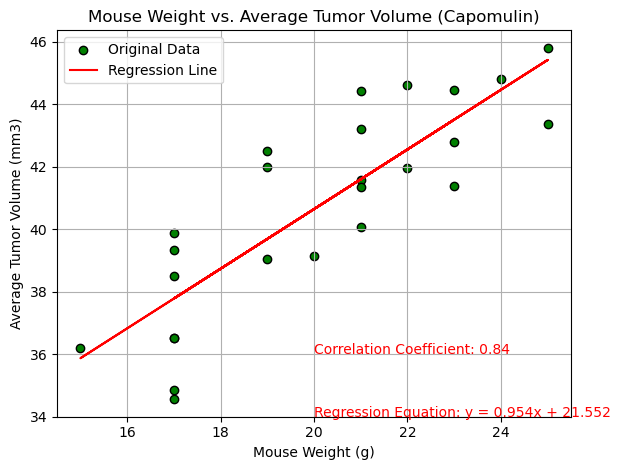

In [101]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)[0]
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
predicted_tumor_volume = slope * mouse_weight + intercept

# Scatter plot with regression line
plt.scatter(mouse_weight, average_tumor_volume, color='green', edgecolors='black', label='Original Data')
plt.plot(mouse_weight, predicted_tumor_volume, color='red', label='Regression Line')

# Annotate the plot with correlation coefficient and regression equation
plt.text(20, 36, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=10, color='red')
plt.text(20, 34, f'Regression Equation: y = {slope:.3f}x + {intercept:.3f}', fontsize=10, color='red')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusions

Through our analysis using pandas and Matplotlib, we observed a positive correlation between mouse weight and tumor volume in mice treated with Capomulin. Heavier mice tended to have larger tumors. Our linear regression model provided a predictive relationship between mouse weight and tumor volume. These findings offer insights into tumor growth under the Capomulin treatment regimen, aiding future research and treatment strategies.